# Housing prices in Ames, Iwoa (dataset downloaded from Kaggle)

We first import the libraries:

In [1]:
#importing main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We then load the data (training set into the housing variable and the validation set into validation_set):

In [2]:
housing = pd.read_csv('./../1 - Dados Originais/train.csv')
validation_set = pd.read_csv('./../1 - Dados Originais/test.csv')

We now have a check some entries and the type of the different attributes in the dataset (what are the categorical and the numerical ones?):

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

As we can see there are 38 are numerical attributes and 43 categorical ones, with a total of 81 attributes. Naturally some of the 35 integer attributes may be discrete. There are also 1460 entries in the training set. We can see that there are some attributes with a lot of missing instances (such as PoolQC, MiscFeature and Fence). Perhaps, we can throw some away in future steps? For now lets hold onto all the data.
Next, we call the describe function to probe the properties of the numerical attributes:

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We also want to probe for correlations between the numerical attributes and the target:

In [6]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
housing["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

We can see that there are some attributes that have a strong correlation with our target attribute, the Sale Price. Let's check the scatter matrix:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


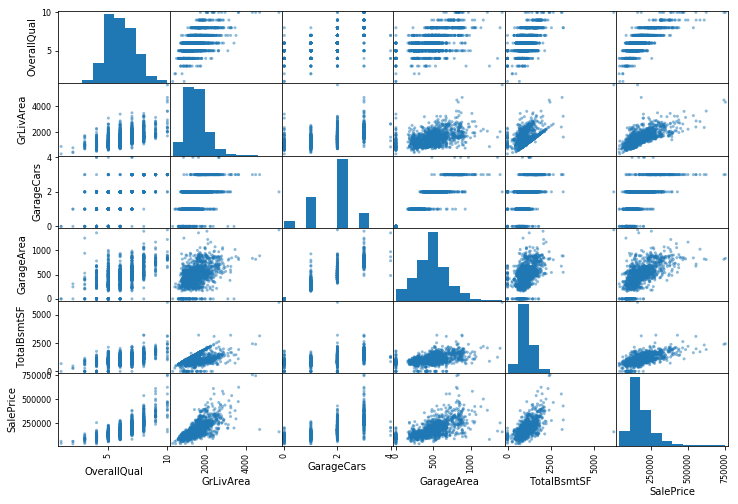

In [8]:
from pandas.tools.plotting import scatter_matrix
attributes = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

Before we proceed, I will train some models with the current numerical attributes only and see how well they perform. First I make a copy of the training set and then I drop the categorical columns:

In [9]:
housing_num = housing.copy() #creates a copy of the training dataset

In [10]:
allcol = housing_num.columns
num = housing_num._get_numeric_data().columns
cat = list(set(allcol) - set(num)) #got a list of names with all categorical attributes

In [11]:
housing_num = housing_num.drop(cat, axis=1) #finally the number of attributes in this dataset is now 38, the number of numerical attributes in the original dataset
housing_num.columns.size

38

We now split the predictor and target attributes: 

In [12]:
housing_labels = housing_num['SalePrice'].copy()
housing_num = housing_num.drop('SalePrice', axis=1)

Here we import the models we will employ as well as cost/score functions:

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion

In [69]:
imputer = Imputer(strategy='median')
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [70]:
X = imputer.transform(housing_num)
housing_num_df = pd.DataFrame(X, columns=housing_num.columns)

We now transform the DataFrames in numpy arrays:

In [71]:
housing_prep = housing_num_df.values
housing_prep_labels = housing_labels.values.reshape(-1,1)

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prep,housing_prep_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
scores = cross_val_score(lin_reg, housing_prep,housing_prep_labels,scoring = 'neg_mean_absolute_error', cv=10)
lin_reg_rmse_scores = -scores

In [74]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [75]:
display_scores(lin_reg_rmse_scores)

Scores: [66674.21376446 61728.8488128  54552.12428377 61505.12194337
 54612.19193874 54110.77435353 65021.48355829 56734.86231792
 58297.96172294 52616.43317892]
Mean: 58585.401587474764
Standard Deviation: 4652.631209488562


There seems to be some models that are performing really poorly (take a look at the second last model!), so we will shuffle the instances and see if we can reduce this problem:

In [78]:
np.random.seed(42)
shuffle_indexes = np.random.permutation(len(housing_prep_labels))
shuf_housing_prep, shuf_housing_labels = housing_prep[shuffle_indexes], housing_prep_labels[shuffle_indexes]
lin_reg.fit(shuf_housing_prep,shuf_housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
scores = cross_val_score(lin_reg, shuf_housing_prep,shuf_housing_labels,scoring = 'neg_mean_absolute_error', cv=10)
shuf_lin_reg_rmse_scores = -scores
display_scores(shuf_lin_reg_rmse_scores)

Scores: [55180.4781331  56488.5523678  59191.133211   69478.64115534
 63715.36377784 56144.98244529 60446.49185911 56549.72206953
 55870.47203256 53607.23185464]
Mean: 58667.306890622014
Standard Deviation: 4549.566977374931


Well, its seems it actually got worse! Let's try other models!

In [80]:
# A descision tree model!
tree_reg = DecisionTreeRegressor()
tree_reg.fit(shuf_housing_prep,shuf_housing_labels)
scores = cross_val_score(tree_reg, shuf_housing_prep,shuf_housing_labels,scoring = 'neg_mean_absolute_error', cv=10)
tree_reg_rmse_scores = -scores
display_scores(tree_reg_rmse_scores)

Scores: [81043.53424658 74022.68493151 83181.65068493 93574.78082192
 82223.71917808 79999.65753425 85558.30821918 76149.38356164
 72018.10273973 81007.46575342]
Mean: 80877.92876712329
Standard Deviation: 5821.510807576368


In [81]:
# A random forest regressor model!
forest_reg = RandomForestRegressor()
forest_reg.fit(shuf_housing_prep,shuf_housing_labels.ravel())
scores = cross_val_score(forest_reg, shuf_housing_prep,shuf_housing_labels.ravel(),scoring = 'neg_mean_absolute_error', cv=10)
forest_reg_rmse_scores = -scores
display_scores(forest_reg_rmse_scores)

Scores: [61651.65890411 58012.40342466 60362.45821918 72096.35136986
 68276.84794521 62107.36369863 69910.13082192 63051.66849315
 62466.57123288 59206.95068493]
Mean: 63714.24047945205
Standard Deviation: 4498.4358875349935


In [82]:
# A support vector machine regressor model!
svm_reg = SVR()
svm_reg.fit(shuf_housing_prep,shuf_housing_labels.ravel())
scores = cross_val_score(svm_reg, shuf_housing_prep,shuf_housing_labels.ravel(),scoring = 'neg_mean_absolute_error', cv=10)
svm_reg_rmse_scores = -scores
display_scores(svm_reg_rmse_scores)

Scores: [53601.64383562 50691.25251142 55923.83561644 68862.58767123
 56577.91438356 50027.89726027 60034.62328767 52963.99315068
 53787.92465753 53829.10228311]
Mean: 55630.07746575342
Standard Deviation: 5187.678103331702


It seems the best method for the numerical part of the dataset is the random forest regressor. Aside from filling the numerical attributes with the median, we haven't performed any sort of cleaning nor manipulation. So let's do just that! And in order to make everything easier we will place these transformations on our pipeline. 






# Second part starts here






Let's make a copy of our training set:

In [83]:
housing2 = housing.copy()

Regarding the categorical attributes, there are basically two groups the ones which have categories that are basically grading that feature and the ones which don't. Therefore we have 3 different groups of attributes: numerical, 'grading' categorical and 'descriptive' categorical. Each group has to be treated separately:

In [84]:
grading_attributes = ['Street','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Functional','FireplaceQu','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
desc_attributes = list(set(cat)-set(grading_attributes))
num = list(set(num)-set(['SalePrice']))
print(num, grading_attributes,desc_attributes)

['OverallCond', 'OverallQual', 'WoodDeckSF', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'BedroomAbvGr', 'LotFrontage', 'YrSold', 'GarageArea', 'MoSold', 'TotRmsAbvGrd', 'LowQualFinSF', 'GarageCars', 'ScreenPorch', 'GrLivArea', '1stFlrSF', 'GarageYrBlt', '2ndFlrSF', 'LotArea', 'YearBuilt', 'MiscVal', 'BsmtHalfBath', 'Id', 'TotalBsmtSF', 'MSSubClass', 'MasVnrArea', 'YearRemodAdd', '3SsnPorch', 'KitchenAbvGr', 'OpenPorchSF', 'FullBath', 'EnclosedPorch', 'BsmtFinSF2', 'BsmtFinSF1', 'PoolArea', 'HalfBath'] ['Street', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'] ['GarageFinish', 'LotConfig', 'KitchenQual', 'MasVnrType', 'Alley', 'Heating', 'RoofMatl', 'Condition1', 'Electrical', 'LandContour', 'Exterior2nd', 'MiscFeature', 'BldgType', 'HouseStyle', 'SaleCondition', 'Condition2', 'Neighborhood', 'Gar

Next, we set out to create a list of lists, where each one of the lists contains the values that are present in the columns. This will be important later on to assign numerical grades instead of words such as 'Excelent' or 'Poor'. This point will be made clear later on:

In [85]:
grdattr_grades = []
for el in grading_attributes:
    grdattr_grades += [list(housing2[el].unique())]
print(grdattr_grades)

[['Pave', 'Grvl'], ['AllPub', 'NoSeWa'], ['Gtl', 'Mod', 'Sev'], ['Gd', 'TA', 'Ex', 'Fa'], ['TA', 'Gd', 'Fa', 'Po', 'Ex'], ['Gd', 'TA', 'Ex', nan, 'Fa'], ['TA', 'Gd', nan, 'Fa', 'Po'], ['No', 'Gd', 'Mn', 'Av', nan], ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], ['Ex', 'Gd', 'TA', 'Fa', 'Po'], ['Y', 'N'], ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], ['Y', 'N', 'P'], [nan, 'Ex', 'Fa', 'Gd'], [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']]


We then modify the list generated including the missing values which were not present in the columns but that appear in the description file, and we also modify the order of the values so that values that represent the best grades get the higher indices and the values that are associated with poor quality get bad grades. We did this manually since the number of attributes is not very large, but a better approach would be to read the description file and create this list directly from the values that are present there.

In [86]:
grdattr_grades = [['Grvl', 'Pave'], ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], ['Sev','Mod', 'Gtl'], ['Po','Fa', 'TA', 'Gd', 'Ex'], ['Po','Fa', 'TA', 'Gd', 'Ex'], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA', 'No', 'Mn', 'Av', 'Gd'], ['NA', 'Unf', 'Rec', 'LwQ', 'BLQ', 'ALQ', 'GLQ'], ['NA', 'Unf', 'Rec', 'LwQ', 'BLQ', 'ALQ', 'GLQ'], ['Po','Fa', 'TA', 'Gd', 'Ex'], ['N', 'Y'], ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA',"Po","Fa","TA","Gd","Ex"], ['N', 'P', 'Y'], ['NA', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'MnWw', 'GdWo',  'MnPrv', 'GdPrv']]

Now that we've settled this, we will create three different pipelines for each one of those groups to make it easier the cleaning and transformation of our dataset. This will make part of the finetuning much easier later on. But, first, we will create a transformation which will allow us to select the attributes we want and return a numpy array. We will create it in a way as to make it fully compatible with the pipeline module from scikitlearn:

In [87]:
from sklearn.base import TransformerMixin, BaseEstimator

class Selector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, DF, y=None):
        return self
    def transform(self, DF):
        return DF[self.attribute_names].values

We will also create two important categorical classes that will allow us to deal with the categorical attributes more efficiently:

In [88]:
#allows us to fill all NaN categorical values with any text we want. Default = 'NA'
class FillCatNaN(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,txt='NA'):
        self.attribute_names = attribute_names
        self.txt = txt
    def fit(self, DF, y=None):
        return self
    def transform(self, DF):
        for attr in self.attribute_names:
            DF[attr].fillna(self.txt, inplace=True)
        return DF

#this class allows us to assign an integer value based on the string grade. For instance, 'Ex' = 5, 'TA'=3, 'Po'=1 and so on. 
#the higher the value, the better condition of the house is.
class ChangeGrdTxtToNum(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,attribute_values):
        self.attribute_names = attribute_names
        self.attribute_values = attribute_values
    def fit(self,DF,y=None):
        return self
    def transform(self, DF):
        for i, attr in enumerate(self.attribute_names):
            DF[attr] = DF[attr].apply(lambda x : self.attribute_values[i].index(x))
        return DF
    
#this class creates a multicolumn label binarizer. this is important because the label binarizer that comes with scikit learn
#only takes 1d arrays
class MultiColumnLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,DSET,y=None):
        return self
    def transform(self, DSET):
        lb = LabelBinarizer()
        lb.fit(DSET[:,0])
        TRANSFMSET = lb.transform(DSET[:,0]) 
        for i, _ in enumerate(DSET[1,1:]):
            lb.fit(DSET[:,i+1])
            TEMP = lb.transform(DSET[:,i+1])
            TRANSFMSET = np.column_stack((TRANSFMSET,TEMP))
        return TRANSFMSET

In [89]:
num_pipeline = Pipeline([
        ('selector', Selector(num)),
        ('imputer', Imputer(strategy='median')),
        ('std_scaler', StandardScaler()),
])

grading_cat_pipeline = Pipeline([
        ('fillcat', FillCatNaN(grading_attributes)),
        ('txttonum', ChangeGrdTxtToNum(grading_attributes,grdattr_grades)),
        ('selector', Selector(grading_attributes)),
])

desc_cat_pipeline = Pipeline([
        ('fillcat', FillCatNaN(desc_attributes)),
        ('selector', Selector(desc_attributes)),
        ('label_binarizer', MultiColumnLabelBinarizer(desc_attributes)),
])

full_pipeline = FeatureUnion(transformer_list = [
        ('num_pipeline', num_pipeline),
        ('grading_cat_pipeline', grading_cat_pipeline),
        ('desc_cat_pipeline', desc_cat_pipeline),
])

After creating the full transformation pipeline, we apply it to our dataset and subsequently check how the models we previously tried performed:

In [90]:
num = housing._get_numeric_data().columns
grading_attributes = ['Street','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Functional','FireplaceQu','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
desc_attributes = list(set(cat)-set(grading_attributes))
num = list(set(num)-set(['SalePrice']))
print(num, grading_attributes,desc_attributes)

['OverallCond', 'OverallQual', 'WoodDeckSF', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'BedroomAbvGr', 'LotFrontage', 'YrSold', 'GarageArea', 'LowQualFinSF', 'TotRmsAbvGrd', 'MoSold', 'GarageCars', 'ScreenPorch', 'GrLivArea', '1stFlrSF', 'GarageYrBlt', '2ndFlrSF', 'LotArea', 'YearBuilt', 'MiscVal', 'BsmtHalfBath', 'Id', 'TotalBsmtSF', 'MSSubClass', 'MasVnrArea', 'YearRemodAdd', '3SsnPorch', 'KitchenAbvGr', 'OpenPorchSF', 'FullBath', 'EnclosedPorch', 'BsmtFinSF2', 'BsmtFinSF1', 'PoolArea', 'HalfBath'] ['Street', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'] ['GarageFinish', 'LotConfig', 'KitchenQual', 'MasVnrType', 'Alley', 'Heating', 'RoofMatl', 'Condition1', 'Electrical', 'LandContour', 'Exterior2nd', 'MiscFeature', 'BldgType', 'HouseStyle', 'SaleCondition', 'Condition2', 'Neighborhood', 'Gar

In [91]:
housing2 = housing.copy()
np.random.seed(42)
housing_labels = housing2['SalePrice'].copy()
housing2 = housing2.drop('SalePrice', axis=1)
shuffle_indexes = np.random.permutation(len(housing_labels))
housing_labels, housing2 = housing_labels[shuffle_indexes], pd.DataFrame(np.array(housing2)[shuffle_indexes], columns=housing2.columns)
housing_prep = full_pipeline.fit_transform(housing2)
housing_prep.shape

(1460, 235)

In [92]:
# A random forest regressor model!
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prep,housing_labels.ravel())
scores = cross_val_score(forest_reg, housing_prep,housing_labels.ravel(),scoring = 'neg_mean_absolute_error', cv=10)
forest_reg_rmse_scores = -scores
display_scores(forest_reg_rmse_scores)

Scores: [17460.86712329 19409.82328767 15542.52876712 19553.49520548
 22897.27739726 21642.29315068 19480.03767123 20636.03150685
 19134.22671233 14577.35821918]
Mean: 19033.39390410959
Standard Deviation: 2438.0626422216733


In [93]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prep,housing_labels)
scores = cross_val_score(lin_reg, housing_prep, housing_labels,scoring = 'neg_mean_absolute_error', cv=10)
lin_reg_rmse_scores = -scores
display_scores(lin_reg_rmse_scores)

Scores: [2.96977029e+12 2.80370886e+11 6.09170865e+12 1.76457877e+04
 4.74414616e+10 2.50113772e+13 1.17167538e+13 2.82605155e+12
 2.70769818e+13 7.18167748e+12]
Mean: 8320213309558.24
Standard Deviation: 9535864521017.512


In [94]:
# A descision tree model!
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prep, housing_labels)
scores = cross_val_score(tree_reg, housing_prep,housing_labels,scoring = 'neg_mean_absolute_error', cv=10)
tree_reg_rmse_scores = -scores
display_scores(tree_reg_rmse_scores)

Scores: [22209.8630137  25196.56849315 24129.24657534 35282.23972603
 26663.95890411 25276.3630137  25921.26027397 28468.67808219
 23101.3630137  22115.1369863 ]
Mean: 25836.46780821918
Standard Deviation: 3673.720536959051


In [95]:
# A support vector machine regressor model!
svm_reg = SVR()
svm_reg.fit(housing_prep,housing_labels.ravel())
scores = cross_val_score(svm_reg, housing_prep,housing_labels.ravel(),scoring = 'neg_mean_absolute_error', cv=10)
svm_reg_rmse_scores = -scores
display_scores(svm_reg_rmse_scores)

Scores: [62949.57115632 55940.86930677 51984.86146992 60380.78033003
 55214.75986171 50240.22547586 60829.27378638 54345.86183891
 52795.89958437 51136.0603204 ]
Mean: 55581.81631306636
Standard Deviation: 4190.914758557625


No great changes!

In [96]:
Attributes = []
Attributes += num
Attributes += grading_attributes
lb = LabelBinarizer()
h = housing.copy()
FNaN = FillCatNaN(desc_attributes)
FNaN.fit_transform(h)
for el in desc_attributes:
    lb.fit(h[el])
    a = list(lb.classes_)
    for i, word in enumerate(a):
        a[i] = el + ' - ' + word 
    Attributes += a
Attributes += ['SalePrice']

Now that we have transformed our dataset, we have only numerical attributes. Next, we check the correlations between the predictors and target attributes, before and after the transformation. We can see that there is non negligible number of categorical attributes with high (anti)correlations with the Sale Price (before the transformation we couldn't see that!).

In [97]:
corr_matrix2 = pd.DataFrame(np.column_stack((housing_prep,housing_labels)), columns=Attributes).corr()
#corr_matrix['SalePrice'].sort_values(ascending=False).head(15)
corr = corr_matrix2.iloc[:,-1].sort_values(ascending=False).head(28)
corr

SalePrice                  1.000000
OverallQual                0.790982
GrLivArea                  0.708624
ExterQual                  0.682639
GarageCars                 0.640409
GarageArea                 0.623431
TotalBsmtSF                0.613581
1stFlrSF                   0.605852
BsmtQual                   0.585207
FullBath                   0.560664
TotRmsAbvGrd               0.533723
YearBuilt                  0.522897
FireplaceQu                0.520438
YearRemodAdd               0.507101
KitchenQual - Ex           0.504094
Foundation - PConc         0.497734
MasVnrArea                 0.472614
Fireplaces                 0.466929
GarageYrBlt                0.466754
HeatingQC                  0.427649
GarageFinish - Fin         0.419678
Neighborhood - NridgHt     0.402149
BsmtFinSF1                 0.386420
BsmtExposure               0.374696
SaleType - New             0.357509
SaleCondition - Partial    0.352060
GarageType - Attchd        0.335961
LotFrontage                0

In [98]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

Let's attempt a grid search using the random forest regressor algorithm!

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = [
    {'n_estimators': [800], 'max_features': [5,6,7]},
    #{'bootstrap': [False], 'n_estimators': [3,30], 'max_features': [2, 8, 16]}
]

In [101]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(housing_prep, housing_labels.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [800], 'max_features': [5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [102]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Now we can finally check what are the attributes that are not important to generate a good model! What's more it seems really strange that the Id attribute (which I forgot to remove earlier) is important to fit it.

In [103]:
feature_importances = grid_search.best_estimator_.feature_importances_
Attr = Attributes
Attr.pop(-1)
bestattributes = sorted(zip(feature_importances,Attr), reverse = True)
bestattributes

[(0.053093181718803145, 'OverallQual'),
 (0.05034656268329492, 'GrLivArea'),
 (0.03980022533862318, 'GarageArea'),
 (0.03677451530914446, 'TotalBsmtSF'),
 (0.036356434221533784, '1stFlrSF'),
 (0.03457243678766116, 'GarageCars'),
 (0.03329680352227829, 'YearBuilt'),
 (0.032504666800450714, 'BsmtQual'),
 (0.031644538592388416, 'ExterQual'),
 (0.02625310837276004, 'BsmtFinSF1'),
 (0.025039791486644765, 'FullBath'),
 (0.02358437025476613, 'GarageYrBlt'),
 (0.022995529322354758, 'TotRmsAbvGrd'),
 (0.022916066820253506, 'YearRemodAdd'),
 (0.022275637719385, 'LotArea'),
 (0.022013584309847265, '2ndFlrSF'),
 (0.021782577323154376, 'KitchenQual - Ex'),
 (0.019517311711286612, 'KitchenQual - TA'),
 (0.018206319868880893, 'MasVnrArea'),
 (0.017881367698075416, 'FireplaceQu'),
 (0.01665068374125854, 'Fireplaces'),
 (0.015939166533881655, 'OpenPorchSF'),
 (0.015803350488913574, 'LotFrontage'),
 (0.01556230369698055, 'Foundation - PConc'),
 (0.012388558100159661, 'BsmtFinType1'),
 (0.011443857459837

What I'll do now to select the attributes that have a weight greater than 0.001. I'll try employing only those attributes to create the next model. Of course, I'll remove the Id attribute as well. Employing a list comprehension:

In [104]:
abovethresh = [bestattributes[i][1] for i, _ in enumerate(bestattributes) if bestattributes[i][0] > 0.01 ]

In [105]:
#abovethresh.remove('Id')
belowthresh = list(set(Attr) - set(abovethresh))
indexed = pd.DataFrame(housing_prep, columns=Attr)
housing_dropped = indexed.copy()
for el in belowthresh:
    housing_dropped = housing_dropped.drop(el, axis=1)

We have just dropped 207 attributes:

In [106]:
len(belowthresh)

206

In [107]:
select = Selector(abovethresh)
housing_dropped_prep = select.fit_transform(housing_dropped)

In [108]:
# A random forest regressor model!
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_dropped_prep,housing_labels.ravel())
scores = cross_val_score(forest_reg, housing_dropped_prep,housing_labels.ravel(),scoring = 'neg_mean_absolute_error', cv=10)
forest_reg_rmse_scores = -scores
display_scores(forest_reg_rmse_scores)

Scores: [18378.73630137 20636.99611872 15580.69794521 20522.17876712
 22586.18767123 21851.21369863 20341.33082192 19943.2869863
 17895.98287671 14672.96027397]
Mean: 19240.957146118722
Standard Deviation: 2451.8365164572783


In [109]:
lin_reg = LinearRegression()
lin_reg.fit(housing_dropped_prep,housing_labels)
scores = cross_val_score(lin_reg, housing_dropped_prep, housing_labels,scoring = 'neg_mean_absolute_error', cv=10)
lin_reg_rmse_scores = -scores
display_scores(lin_reg_rmse_scores)

Scores: [22131.52603176 22795.35382798 19576.5089025  22384.54876545
 23226.66734369 24411.36424021 20927.3054535  19254.04228856
 19903.64208309 17165.21312297]
Mean: 21177.617205971717
Standard Deviation: 2090.1714603950873


Have a look at the linear regression model, its a huge improvement over the model built upon the 235 column set. That probably has to do with the fact that many of the attributes were not independent! Let's make a grid search again.

In [110]:
param_grid = [
    {'n_estimators': [800,900], 'max_features': [7]},
    #{'bootstrap': [False], 'n_estimators': [3,30], 'max_features': [2, 8, 16]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(housing_dropped_prep, housing_labels.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [800, 900], 'max_features': [7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [111]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.20262422, 0.11383817, 0.0495742 , 0.06008971, 0.04519802,
       0.08711251, 0.05146655, 0.03641093, 0.08939898, 0.02932813,
       0.02267496, 0.0165489 , 0.01559358, 0.01415886, 0.02486226,
       0.0303597 , 0.01447295, 0.00775473, 0.01174061, 0.01291913,
       0.00933651, 0.00847867, 0.01250498, 0.00303983, 0.00538706,
       0.00747607, 0.00234544, 0.00978562, 0.00551872])

In [112]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=900, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [123]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(-mean_score,params)

16869.001947080884 {'n_estimators': 800, 'max_features': 7}
16800.922392675944 {'n_estimators': 900, 'max_features': 7}


Best model has a mean absolute error score of approximately 28584, a bit lower than the original model, but as low as we it could be yet. Below we list the most important attributes used to predict the Sale Price. They are list in order of importance (The first one is the most important and so on so forth).

In [114]:
len(abovethresh)

29

In [65]:
comparison = np.column_stack((np.array(abovethresh),np.array(list(corr.index))))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
pd.DataFrame(comparison, columns=["Most important attributes according to RF model","Most correlated attributes with target"])

In [ ]:
for attr in comparison[:,0]:
    plt.title(attr)
    housing_dropped[attr].hist()
    plt.show()

In [115]:
svm_reg = SVR(kernel='rbf', C=10, gamma=10)
svm_reg.fit(housing_dropped_prep,housing_labels.ravel())
scores = cross_val_score(svm_reg, housing_dropped_prep,housing_labels.ravel(),scoring = 'neg_mean_absolute_error', cv=10)
svm_reg_rmse_scores = -scores
display_scores(svm_reg_rmse_scores)

Scores: [62996.44334753 55988.32647778 52027.78564981 60424.05470027
 55260.76471192 50278.24634156 60873.58081606 54386.56417941
 52835.84221243 51175.4160741 ]
Mean: 55624.702451087265
Standard Deviation: 4193.101758108621


In [116]:
param_grid_svm = [
    {"kernel": ['linear'], "C":[1,10,100,1000,10000]}
]
svm_reg = SVR()
gridsvm = GridSearchCV(svm_reg, param_grid_svm, cv=10, scoring="neg_mean_absolute_error")
gridsvm.fit(housing_dropped_prep,housing_labels.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [117]:
sorted(zip(-gridsvm.cv_results_['mean_test_score'],gridsvm.cv_results_["params"]))

[(19597.81913025767, {'C': 10000, 'kernel': 'linear'}),
 (19616.083789996213, {'C': 1000, 'kernel': 'linear'}),
 (20413.765778663612, {'C': 100, 'kernel': 'linear'}),
 (25926.987560904945, {'C': 10, 'kernel': 'linear'}),
 (48683.06902785839, {'C': 1, 'kernel': 'linear'})]

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon, reciprocal

rand_param_grid_svm =     {"kernel": ['linear','rbf'],  'C': reciprocal(20, 200000),  'gamma': expon(scale=1.0)}
#   {"kernel": ['rbf'], "C": randint(low=1, high=50000), "gamma": randint(low=1, high=10000)}


svm_reg = SVR()
randsvm = RandomizedSearchCV(svm_reg, param_distributions=rand_param_grid_svm, n_iter=20, n_jobs=4, cv=10, random_state=42, scoring="neg_mean_squared_error")
randsvm.fit(housing_dropped_prep, housing_labels.ravel())

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=4,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f127ccb9a20>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f127ccb9c88>, 'kernel': ['linear', 'rbf']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [119]:
sorted(zip(-randsvm.cv_results_['mean_test_score'],randsvm.cv_results_["params"]))

[(1144960906.8057904,
  {'C': 113564.03940586245, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}),
 (1273197821.222116,
  {'C': 5385.293820172355, 'gamma': 0.18696125197741642, 'kernel': 'linear'}),
 (1279742695.6302423,
  {'C': 432.37884813148855, 'gamma': 0.15416196746656105, 'kernel': 'linear'}),
 (1282464244.1431406,
  {'C': 34246.75194632794, 'gamma': 0.3632878599687583, 'kernel': 'linear'}),
 (1282493777.3375852,
  {'C': 27652.464358739708, 'gamma': 0.2227358621286903, 'kernel': 'linear'}),
 (1284047777.8815928,
  {'C': 629.782329591372, 'gamma': 3.010121430917521, 'kernel': 'linear'}),
 (1288684571.60964,
  {'C': 171377.39570378003, 'gamma': 0.628789100540856, 'kernel': 'linear'}),
 (1339335016.8300045,
  {'C': 135.76775824842434, 'gamma': 0.838636245624803, 'kernel': 'linear'}),
 (1426395234.7563221,
  {'C': 61.54360542501371, 'gamma': 0.6835472281341501, 'kernel': 'linear'}),
 (1697908645.406817,
  {'C': 21.344953672647435,
   'gamma': 0.023332523598323388,
   'kernel': 'lin

In [120]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [121]:
k=28
feature_importances = grid_search.best_estimator_.feature_importances_

transf_pipeline = Pipeline([
 #   ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

new_housing = transf_pipeline.fit_transform(housing_dropped_prep)

In [122]:
lin_reg = LinearRegression()
lin_reg.fit(new_housing,housing_labels)
scores = cross_val_score(lin_reg, new_housing, housing_labels,scoring = 'neg_mean_absolute_error', cv=10)
lin_reg_rmse_scores = -scores
display_scores(lin_reg_rmse_scores)

Scores: [22490.7699658  22870.90163461 19565.92131711 22402.89998432
 23121.52312086 24296.49262736 21238.49550211 19296.73358621
 19876.6530806  17416.90794248]
Mean: 21257.72987614675
Standard Deviation: 2037.3833397509068
